In [1]:
import nltk
import pandas as pd

In [33]:
read_file=pd.read_csv("C:\\Users\\YashnaBehera\\Desktop\\prez_debate_2020.txt",encoding='cp1252',delimiter="\t",error_bad_lines=False,warn_bad_lines=False,header=None)
read_file.to_csv("C:\\Users\\YashnaBehera\\Desktop\\election debate trans.csv")
read_file.columns=["Speaker","Words"]
read_file

,Speaker,Words
0,CHRIS WALLACE:,"Good evening, from the Health Education Campus..."
1,JOE BIDEN:,"How you doing, man?"
2,DONALD TRUMP:,How are you?
3,JOE BIDEN:,Doing well.
4,CHRIS WALLACE:,"Gentlemen, a lot of people have been waiting f..."
...,...,...
1298,CHRIS WALLACE:,We're going to leave it there.
1299,DONALD TRUMP:,I think he does too.
1300,CHRIS WALLACE:,"Uh, to be continued as, in more debates as we ..."
1301,JOE BIDEN:,Yes.


In [34]:
#converting data type to string and exploring data

read_file["Words"]=read_file['Words'].astype(str)
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Speaker  1303 non-null   object
 1   Words    1303 non-null   object
dtypes: object(2)
memory usage: 20.5+ KB


# Removing Punctuation

In [35]:
import string 
string.punctuation

def no_punctuation(text):
    no_punctuation_text= "".join([c for c in text if c not in string.punctuation])
    return no_punctuation_text

read_file["clean_words"]= read_file["Words"].apply(lambda x : no_punctuation(x))
read_file.head()

,Speaker,Words,clean_words
0,CHRIS WALLACE:,"Good evening, from the Health Education Campus...",Good evening from the Health Education Campus ...
1,JOE BIDEN:,"How you doing, man?",How you doing man
2,DONALD TRUMP:,How are you?,How are you
3,JOE BIDEN:,Doing well.,Doing well
4,CHRIS WALLACE:,"Gentlemen, a lot of people have been waiting f...",Gentlemen a lot of people have been waiting fo...


**Get rid of some additional punctuation and non-sensical text**

In [36]:
import re
def clean_text(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    return text

read_file["clean_words"]=read_file["clean_words"].apply(lambda x:clean_text (x))
read_file

,Speaker,Words,clean_words
0,CHRIS WALLACE:,"Good evening, from the Health Education Campus...",Good evening from the Health Education Campus ...
1,JOE BIDEN:,"How you doing, man?",How you doing man
2,DONALD TRUMP:,How are you?,How are you
3,JOE BIDEN:,Doing well.,Doing well
4,CHRIS WALLACE:,"Gentlemen, a lot of people have been waiting f...",Gentlemen a lot of people have been waiting fo...
...,...,...,...
1298,CHRIS WALLACE:,We're going to leave it there.,Were going to leave it there
1299,DONALD TRUMP:,I think he does too.,I think he does too
1300,CHRIS WALLACE:,"Uh, to be continued as, in more debates as we ...",Uh to be continued as in more debates as we go...
1301,JOE BIDEN:,Yes.,Yes


In [50]:
#Grouping dataframe by Speaker
prez_debt=read_file.groupby("Speaker").sum()
prez_debt.drop(prez_debt.index[2],inplace=True)
prez_debt

,Words,clean_words
Speaker,,
CHRIS WALLACE:,"Good evening, from the Health Education Campus...",Good evening from the Health Education Campus ...
DONALD TRUMP:,"How are you?Thank you very much, Chris. I wil...",How are youThank you very much Chris I will t...
JOE BIDEN:,"How you doing, man?Doing well.Well, first of a...",How you doing manDoing wellWell first of all u...
JOE BIDEN:,No.I am not wrong.,NoI am not wrong


# CountVectorizarion

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')
X= cv.fit(prez_debt["clean_words"])
print (X.vocabulary_)
#gives the index of the unique words
print ("   ")
print (cv.get_feature_names())
#arranges the word according to the index

X= cv.transform(prez_debt["clean_words"])
X= cv.fit_transform(prez_debt["clean_words"])
print (X)
print (X.toarray())
#gives the frequency of the words used in the sentences according to the index

{'good': 802, 'evening': 632, 'health': 868, 'education': 577, 'campus': 232, 'case': 247, 'western': 2255, 'reserve': 1668, 'university': 2154, 'cleveland': 305, 'clinic': 307, 'im': 942, 'chris': 285, 'wallace': 2213, 'fox': 756, 'news': 1284, 'welcome': 2247, 'presidential': 1512, 'debates': 441, 'president': 1508, 'donald': 544, 'trump': 2124, 'vice': 2182, 'joe': 1021, 'biden': 161, 'debate': 440, 'sponsored': 1892, 'commission': 324, 'designed': 475, 'format': 749, 'roughly': 1716, 'segments': 1777, 'answers': 81, 'candidate': 233, 'question': 1579, 'open': 1351, 'discussion': 505, 'rest': 1676, 'segment': 1774, 'campaigns': 231, 'agreed': 43, 'rules': 1718, 'record': 1633, 'decided': 450, 'topics': 2087, 'questions': 1585, 'topic': 2086, 'assure': 115, 'shared': 1801, 'candidates': 234, 'conducted': 347, 'safety': 1730, 'protocols': 1560, 'serving': 1793, 'security': 1769, 'advisor': 32, 'precaution': 1499, 'shake': 1797, 'hands': 845, 'beginning': 152, 'tonights': 2082, 'audien

In [52]:
#convering above given word frequency into data frame
df1= pd.DataFrame(X.toarray(), columns= cv.get_feature_names())
df1.index = prez_debt["clean_words"].index
df1.head()

,ability,able,abolishing,abouti,abraham,absolutely,absorbed,abuse,academic,accept,...,youll,young,younger,youno,youokayall,youre,youthank,youthere,youve,zero
Speaker,,,,,,,,,,,,,,,,,,,,,
CHRIS WALLACE:,0,1,1,0,1,0,0,1,0,0,...,2,0,0,1,1,13,0,0,8,1
DONALD TRUMP:,0,1,0,0,0,3,0,0,1,1,...,6,2,1,0,0,19,2,1,13,0
JOE BIDEN:,2,19,0,1,0,2,1,0,0,2,...,0,1,0,0,0,9,0,0,4,1
JOE BIDEN:,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df2 = df1.transpose()
df2

Speaker,CHRIS WALLACE:,DONALD TRUMP:,JOE BIDEN:,JOE BIDEN:
ability,0,0,2,0
able,1,1,19,0
abolishing,1,0,0,0
abouti,0,0,1,0
abraham,1,0,0,0
...,...,...,...,...
youre,13,19,9,0
youthank,0,2,0,0
youthere,0,1,0,0
youve,8,13,4,0


**Find the top 30 words said by each speaker**

In [54]:
top_dict = {}
for c in df2.columns:
    top = df2[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'CHRIS WALLACE:': [('president', 116),
  ('going', 46),
  ('mr', 42),
  ('vice', 40),
  ('let', 39),
  ('question', 39),
  ('sir', 35),
  ('right', 34),
  ('uh', 31),
  ('trump', 29),
  ('want', 27),
  ('im', 27),
  ('people', 21),
  ('biden', 20),
  ('say', 18),
  ('wait', 18),
  ('ask', 18),
  ('ahead', 17),
  ('said', 15),
  ('gentlemen', 15),
  ('segment', 15),
  ('youre', 13),
  ('years', 13),
  ('talk', 13),
  ('minutes', 12),
  ('final', 12),
  ('election', 12),
  ('fact', 12),
  ('like', 11),
  ('end', 11)],
 'DONALD TRUMP:': [('people', 66),
  ('dont', 49),
  ('want', 45),
  ('know', 44),
  ('going', 43),
  ('look', 39),
  ('said', 38),
  ('got', 33),
  ('just', 31),
  ('say', 28),
  ('think', 27),
  ('im', 27),
  ('joe', 25),
  ('didnt', 24),
  ('theyre', 23),
  ('thats', 23),
  ('country', 22),
  ('did', 22),
  ('tell', 22),
  ('uh', 21),
  ('left', 21),
  ('million', 21),
  ('good', 20),
  ('like', 19),
  ('youre', 19),
  ('way', 18),
  ('president', 18),
  ('years', 16),


**Print the top 15 words said by each speaker**

In [55]:
for speaker, top_words in top_dict.items():
    print(speaker)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

CHRIS WALLACE:
president, going, mr, vice, let, question, sir, right, uh, trump, want, im, people, biden
---
DONALD TRUMP:
people, dont, want, know, going, look, said, got, just, say, think, im, joe, didnt
---
JOE BIDEN:
people, going, way, fact, hes, thats, im, uh, said, know, deal, look, did, make
---
JOE BIDEN: 
noi, wrong, zero, gases, general, gear, gave, gathering, gasoline, gas, fraudulent, garland, future, fundamentally
---


**adding common words to the stop word list**

In [56]:
from collections import Counter

#printing out the top 30 words for each speaker
words = []
for speaker in df2.columns:
    top = [word for (word, count) in top_dict[speaker]]
    for t in top:
        words.append(t)
        
words

['president',
 'going',
 'mr',
 'vice',
 'let',
 'question',
 'sir',
 'right',
 'uh',
 'trump',
 'want',
 'im',
 'people',
 'biden',
 'say',
 'wait',
 'ask',
 'ahead',
 'said',
 'gentlemen',
 'segment',
 'youre',
 'years',
 'talk',
 'minutes',
 'final',
 'election',
 'fact',
 'like',
 'end',
 'people',
 'dont',
 'want',
 'know',
 'going',
 'look',
 'said',
 'got',
 'just',
 'say',
 'think',
 'im',
 'joe',
 'didnt',
 'theyre',
 'thats',
 'country',
 'did',
 'tell',
 'uh',
 'left',
 'million',
 'good',
 'like',
 'youre',
 'way',
 'president',
 'years',
 'weve',
 'lot',
 'people',
 'going',
 'way',
 'fact',
 'hes',
 'thats',
 'im',
 'uh',
 'said',
 'know',
 'deal',
 'look',
 'did',
 'make',
 'just',
 'president',
 'sure',
 'like',
 'vote',
 'theyre',
 'able',
 'dont',
 'number',
 'doesnt',
 'tax',
 'want',
 'say',
 'true',
 'heres',
 'american',
 'noi',
 'wrong',
 'zero',
 'gases',
 'general',
 'gear',
 'gave',
 'gathering',
 'gasoline',
 'gas',
 'fraudulent',
 'garland',
 'future',
 'fun

In [57]:
Counter(words).most_common()
#frequency of common words by each speaker

[('president', 3),
 ('going', 3),
 ('uh', 3),
 ('want', 3),
 ('im', 3),
 ('people', 3),
 ('say', 3),
 ('said', 3),
 ('like', 3),
 ('youre', 2),
 ('years', 2),
 ('fact', 2),
 ('dont', 2),
 ('know', 2),
 ('look', 2),
 ('just', 2),
 ('theyre', 2),
 ('thats', 2),
 ('did', 2),
 ('way', 2),
 ('mr', 1),
 ('vice', 1),
 ('let', 1),
 ('question', 1),
 ('sir', 1),
 ('right', 1),
 ('trump', 1),
 ('biden', 1),
 ('wait', 1),
 ('ask', 1),
 ('ahead', 1),
 ('gentlemen', 1),
 ('segment', 1),
 ('talk', 1),
 ('minutes', 1),
 ('final', 1),
 ('election', 1),
 ('end', 1),
 ('got', 1),
 ('think', 1),
 ('joe', 1),
 ('didnt', 1),
 ('country', 1),
 ('tell', 1),
 ('left', 1),
 ('million', 1),
 ('good', 1),
 ('weve', 1),
 ('lot', 1),
 ('hes', 1),
 ('deal', 1),
 ('make', 1),
 ('sure', 1),
 ('vote', 1),
 ('able', 1),
 ('number', 1),
 ('doesnt', 1),
 ('tax', 1),
 ('true', 1),
 ('heres', 1),
 ('american', 1),
 ('noi', 1),
 ('wrong', 1),
 ('zero', 1),
 ('gases', 1),
 ('general', 1),
 ('gear', 1),
 ('gave', 1),
 ('gathe

In [69]:
#if a word is occuring more than once then its been added to stop words
add_stop_words = [word for word, count in Counter(words).most_common() if count > 1]
add_stop_words

['president',
 'going',
 'uh',
 'want',
 'im',
 'people',
 'say',
 'said',
 'like',
 'youre',
 'years',
 'fact',
 'dont',
 'know',
 'look',
 'just',
 'theyre',
 'thats',
 'did',
 'way']

**again CountVectorizing dataframe with new stop words**

In [70]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer


stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

cv=CountVectorizer(stop_words=stop_words)
X= cv.fit(prez_debt["clean_words"])
print (X.vocabulary_)
#gives the index of the unique words
print ("   ")
print (cv.get_feature_names())
#arranges the word according to the index

X= cv.transform(prez_debt["clean_words"])
X= cv.fit_transform(prez_debt["clean_words"])
print (X)
print (X.toarray())
#gives the frequency of the words used in the sentences according to the index

df3= pd.DataFrame(X.toarray(), columns= cv.get_feature_names())
df3.index = prez_debt["clean_words"].index
df3.head()

{'good': 798, 'evening': 630, 'health': 864, 'education': 575, 'campus': 232, 'case': 247, 'western': 2237, 'reserve': 1657, 'university': 2138, 'cleveland': 305, 'clinic': 307, 'chris': 285, 'wallace': 2197, 'fox': 753, 'news': 1275, 'welcome': 2229, 'presidential': 1501, 'debates': 441, 'donald': 543, 'trump': 2109, 'vice': 2166, 'joe': 1016, 'biden': 161, 'debate': 440, 'sponsored': 1879, 'commission': 324, 'designed': 475, 'format': 746, 'roughly': 1705, 'segments': 1764, 'answers': 81, 'candidate': 233, 'question': 1568, 'open': 1342, 'discussion': 504, 'rest': 1665, 'segment': 1761, 'campaigns': 231, 'agreed': 43, 'rules': 1707, 'record': 1622, 'decided': 450, 'topics': 2072, 'questions': 1574, 'topic': 2071, 'assure': 115, 'shared': 1788, 'candidates': 234, 'conducted': 347, 'safety': 1719, 'protocols': 1549, 'serving': 1780, 'security': 1756, 'advisor': 32, 'precaution': 1489, 'shake': 1784, 'hands': 841, 'beginning': 152, 'tonights': 2067, 'audience': 118, 'hall': 837, 'promis

,ability,able,abolishing,abouti,abraham,absolutely,absorbed,abuse,academic,accept,...,youbut,youll,young,younger,youno,youokayall,youthank,youthere,youve,zero
Speaker,,,,,,,,,,,,,,,,,,,,,
CHRIS WALLACE:,0,1,1,0,1,0,0,1,0,0,...,0,2,0,0,1,1,0,0,8,1
DONALD TRUMP:,0,1,0,0,0,3,0,0,1,1,...,1,6,2,1,0,0,2,1,13,0
JOE BIDEN:,2,19,0,1,0,2,1,0,0,2,...,0,0,1,0,0,0,0,0,4,1
JOE BIDEN:,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Creating Word Cloud

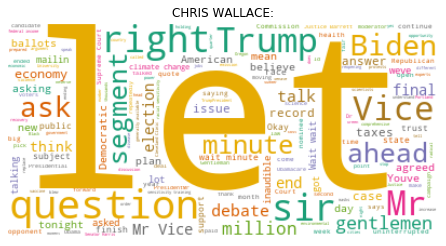

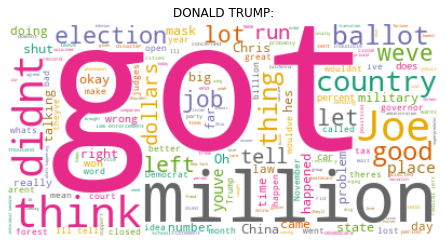

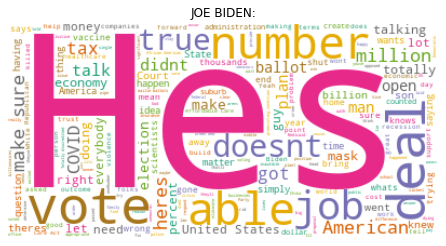

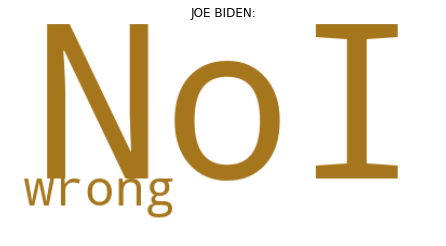

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

speakers=["CHRIS WALLACE:","DONALD TRUMP:","JOE BIDEN:","JOE BIDEN:"]

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=200, random_state=42)

for index, speaker in enumerate(df2.columns):
    wc.generate(prez_debt.clean_words[speaker])

                           
    plt.figure(figsize = (6, 7), facecolor = None) 
    plt.imshow(wc, interpolation="bilinear") 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(speakers[index])
plt.show() 

# Counting Number of Unique Words Said by Each Speaker

In [72]:
unique_list = []
for speaker in df2.columns:
    uniques = df2[speaker].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

speaker=["CHRIS WALLACE:","DONALD TRUMP:","JOE BIDEN:","JOE BIDEN:"]

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(speaker, unique_list)), columns=['speaker', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort


,speaker,unique_words
3,JOE BIDEN:,2
0,CHRIS WALLACE:,889
1,DONALD TRUMP:,1135
2,JOE BIDEN:,1141


# Calculating the words per minute for each speaker

In [73]:
# Find the total number of words that a speaker uses
total_list = []
for speaker in df2.columns:
    totals = sum(df2[speaker])
    total_list.append(totals)
    
#run times from debate, in minutes
run_times = [90, 90, 90, 90]

data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,speaker,unique_words,total_words,run_times,words_per_minute
3,JOE BIDEN:,2,2,90,0.022222
0,CHRIS WALLACE:,889,2325,90,25.833333
2,JOE BIDEN:,1141,2974,90,33.044444
1,DONALD TRUMP:,1135,3241,90,36.011111


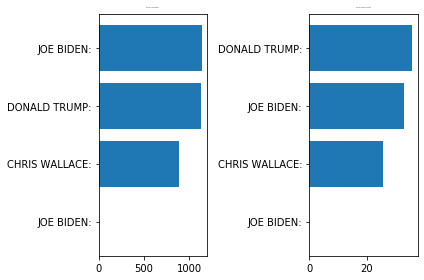

In [74]:
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.speaker)
plt.title('Number of Unique Words', fontsize=1)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.speaker)
plt.title('Number of Words Per Minute', fontsize=1)

plt.tight_layout()
plt.show()

* **Findings**
    * *Both Biden and Trump have used unique words in their debate but Trump has spoken more words in a minute than Biden*